<a href="https://colab.research.google.com/github/Faty177u7/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción de Conocimientos.

**Profesor:** Salvador HM 

**Nombre:** Fatima Yatcin Perez Cruz.

**Grupo:** IDGS91


#Importar Dataset

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import  train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

pd.options.display.max_columns = 9 #Configuración para mostrar columnas deseadas.



#Importar el Dataset

In [224]:
df = pd.read_csv("titanic.csv")

Analizar el dataframe

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [226]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [227]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


#Crear Columna (Feature ingenering )

Procesamiento de las columas y caracteristicas para calcular y imputar valores.

In [228]:
df['Male'] = df ['Sex'] == 'male'

In [229]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


In [230]:
df['Male'].sum()

573

#Scatter Plot



Text(0, 0.5, 'Age')

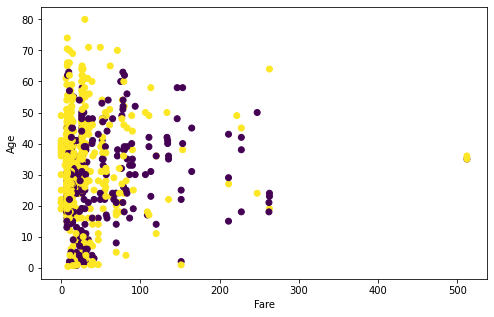

In [231]:
plt.figure(figsize=(8,5))
plt.scatter(df['Fare'], df['Age'],c=df['Male'])
plt.xlabel("Fare")
plt.ylabel("Age")

#Separar Caractersticas y Objetivo

#Con Values

In [232]:
X = df[['Pclass', 'Age','Siblings/Spouses', 'Parents/Children', 'Fare', 'Male']].values
y = df['Survived'].values

In [233]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

#Sin Values

In [234]:
x = df[['Pclass', 'Age','Siblings/Spouses', 'Parents/Children', 'Fare', 'Male']].values
y = df['Survived']

In [235]:
y

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

#Configurar el Modelo

In [236]:
model = LogisticRegression()

#Dividir en Train Test

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=124)

In [238]:
y_test

170    0
114    0
533    0
288    1
616    0
      ..
773    1
349    0
559    0
155    1
523    1
Name: Survived, Length: 178, dtype: int64

#Entrenar

In [239]:
model.fit(X_train,y_train)

LogisticRegression()

#Predicciones

In [240]:
y_pred = model.predict(X_test)

#Analizar las Predicciones

In [241]:
X_test.shape

(178, 6)

In [242]:
X_test[:]

array([[3, 4.0, 4, 1, 29.125, True],
       [3, 21.0, 0, 0, 7.925, True],
       [1, 45.0, 0, 0, 26.55, True],
       ...,
       [2, 28.0, 0, 0, 13.5, True],
       [3, 16.0, 0, 0, 7.7333, False],
       [2, 50.0, 0, 0, 10.5, False]], dtype=object)

In [243]:
y_test[:]

170    0
114    0
533    0
288    1
616    0
      ..
773    1
349    0
559    0
155    1
523    1
Name: Survived, Length: 178, dtype: int64

In [244]:
y_pred[:]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1])

#[:] 
#Sirve para genera un Rango de Valores en el cual se puede especificar el valor.

In [245]:
X_test[0:7]

array([[3, 4.0, 4, 1, 29.125, True],
       [3, 21.0, 0, 0, 7.925, True],
       [1, 45.0, 0, 0, 26.55, True],
       [1, 26.0, 0, 0, 78.85, False],
       [2, 26.0, 0, 0, 10.5, True],
       [1, 41.0, 0, 0, 26.55, True],
       [3, 25.0, 1, 0, 7.925, False]], dtype=object)

In [246]:
y_test[0:7]

170    0
114    0
533    0
288    1
616    0
708    0
725    0
Name: Survived, dtype: int64

In [247]:
y_pred[0:7]

array([0, 0, 0, 1, 0, 0, 1])

#Probabilidad

In [248]:
model.predict_proba(X_test)[:,0]

array([0.93235552, 0.86224444, 0.58860182, 0.03836743, 0.69132219,
       0.54599001, 0.4351215 , 0.36370204, 0.8770083 , 0.79223133,
       0.08631754, 0.08408367, 0.81677853, 0.84621805, 0.42660003,
       0.6341636 , 0.93457743, 0.54903654, 0.92712731, 0.68106384,
       0.89827096, 0.6863383 , 0.0197952 , 0.14721766, 0.80772825,
       0.32660435, 0.85650882, 0.91209463, 0.90985071, 0.88161635,
       0.48386874, 0.1116773 , 0.7084572 , 0.31743375, 0.94012359,
       0.77232017, 0.92270368, 0.89458106, 0.15864022, 0.95094773,
       0.29870009, 0.8718704 , 0.97027795, 0.89571012, 0.54400255,
       0.57078255, 0.37984913, 0.64902283, 0.09455254, 0.22421746,
       0.87326538, 0.03506564, 0.14731011, 0.87929688, 0.04536005,
       0.56483868, 0.07739411, 0.09683841, 0.88467329, 0.87717929,
       0.83391219, 0.90246864, 0.90984567, 0.80419071, 0.19033923,
       0.9541523 , 0.93969162, 0.70691877, 0.97786037, 0.06952715,
       0.3936963 , 0.59894711, 0.89458106, 0.96374939, 0.89870

In [249]:
model.predict_proba(X_test)[0,1]

0.06764447633925483

In [250]:
y.shape

(887,)

In [251]:
y.sum() # Sobrevivientes

342

In [252]:
y.shape - y.sum() #Muertes

array([545])

99.9%  son correos validos

0.1 % Son Spam

accuracy 99%

#Metricas

Accuracy = números de predicción  correctas / total de predicciones.

In [253]:
y_pred == y_test

170    True
114    True
533    True
288    True
616    True
       ... 
773    True
349    True
559    True
155    True
523    True
Name: Survived, Length: 178, dtype: bool

In [254]:
(y_pred == y_test).sum()

141

In [255]:
y_test.shape

(178,)

In [256]:
accuracy = (y_pred == y_test).sum() / y_test.shape
accuracy

array([0.79213483])

#Matriz de Confusión

In [257]:
confusion_matrix(y_test, y_pred)

array([[100,  19],
       [ 18,  41]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


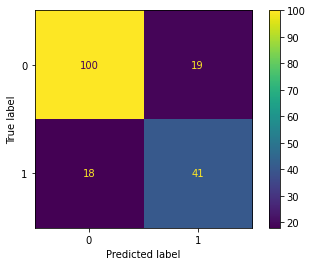

In [258]:
plot_confusion_matrix(model,X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


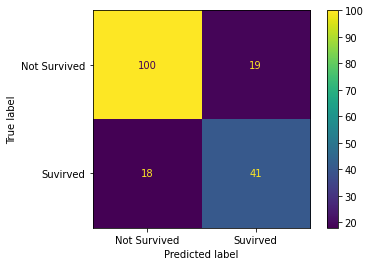

In [259]:
labels = ["Not Survived", "Suvirved"]
plot_confusion_matrix(model, X_test,y_test,display_labels=labels)

In [260]:
labels = ["Not Survived", "Suvirved"]
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

Not Survived       0.85      0.84      0.84       119
    Suvirved       0.68      0.69      0.69        59

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



#Accuracy de la Confusión Matrix

accuracy=suma de Predicciones correctas/total de Predicciones.

In [261]:
accuracy = (95 + 50) / (95 + 50 + 15 + 18)
accuracy

0.8146067415730337

#Precisión

**Enfocarse en lo que predecimos**

¿Que proporción de identificaciones positivas fue realmene correcta?

Precisión = Positivos predichos correctamente / predicciones / Total de Predicciones.


In [262]:
precision = 50 / (50 + 15)
precision

0.7692307692307693

#Recall

**Tiene que ver con lo que se espera de la Fila**

¿Qué Proporcion de Positivos se Identifico Correctamente?

recall = True positive/ (True positive + False Negative)


In [263]:
recall = 50 / (50 + 18)
recall

0.7352941176470589

# F1 Score

**Es el promedio de precisión y recall**

f1_score = 2* ((precisión * recall) / (precisión + recall))

In [264]:
f1 = 2 * ((precision * recall) / (precision + recall))
f1

0.7518796992481205

#SKLearn Metrics

In [265]:
print("Accuracy: {} : {}".format(accuracy,accuracy_score(y_test,y_pred)))

Accuracy: 0.8146067415730337 : 0.7921348314606742


In [266]:
print("Precision: {} : {}".format(precision, precision_score(y_test,y_pred)))

Precision: 0.7692307692307693 : 0.6833333333333333


In [267]:
print("recall: {} : {}".format(recall, recall_score(y_test,y_pred)))

recall: 0.7352941176470589 : 0.6949152542372882


In [268]:
print("F1 Score: {} : {}".format(f1, f1_score(y_test,y_pred)))

F1 Score: 0.7518796992481205 : 0.6890756302521008


In [269]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       119
           1       0.68      0.69      0.69        59

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



# Cambiar el umbral (Thershold)

In [275]:
model.predict_proba(X_test)[:,1]

array([0.06764448, 0.13775556, 0.41139818, 0.96163257, 0.30867781,
       0.45400999, 0.5648785 , 0.63629796, 0.1229917 , 0.20776867,
       0.91368246, 0.91591633, 0.18322147, 0.15378195, 0.57339997,
       0.3658364 , 0.06542257, 0.45096346, 0.07287269, 0.31893616,
       0.10172904, 0.3136617 , 0.9802048 , 0.85278234, 0.19227175,
       0.67339565, 0.14349118, 0.08790537, 0.09014929, 0.11838365,
       0.51613126, 0.8883227 , 0.2915428 , 0.68256625, 0.05987641,
       0.22767983, 0.07729632, 0.10541894, 0.84135978, 0.04905227,
       0.70129991, 0.1281296 , 0.02972205, 0.10428988, 0.45599745,
       0.42921745, 0.62015087, 0.35097717, 0.90544746, 0.77578254,
       0.12673462, 0.96493436, 0.85268989, 0.12070312, 0.95463995,
       0.43516132, 0.92260589, 0.90316159, 0.11532671, 0.12282071,
       0.16608781, 0.09753136, 0.09015433, 0.19580929, 0.80966077,
       0.0458477 , 0.06030838, 0.29308123, 0.02213963, 0.93047285,
       0.6063037 , 0.40105289, 0.10541894, 0.03625061, 0.10129

In [273]:
model.predict_proba(X_test)[:,1] > 0.75

array([False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

#Cambio a

**y_pred**

In [281]:
y_pred = model.predict_proba(X_test)[:,1] > 0.75

In [282]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       119
           1       0.90      0.46      0.61        59

    accuracy                           0.80       178
   macro avg       0.84      0.72      0.74       178
weighted avg       0.82      0.80      0.78       178



#Conclusión

Considero que este tipo de actividad fue muy interesante ya que las predicciones son muy importantes dentro de la mineria de datos, el uso de las metricas nos ayudan a entender mejor los datos ya que si existe alguna anomalia podemos encontrarla mediante los metodos que se realizan, ademas de que las grafias nos ayudan a comprender como esta realmente los datos. Creo que el saber analizar este tipo de datos nos ayuda a verificar que esta mal dentro de un dataframe. Yo creo que tambien es muy bueno comenzar a analizar este tipo de ejercicios ya que no siempre los datos vienen en orden, si no que en algunos casos hay que trabajar con ellos y darles un buen analisis, para su uso, en este caso los datos venian amigables, pero me imagino que existen otros csv, un poco complejos que se podrian resolver con diferentes técnicas.